# Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

Frida Cano Falcón - A01752953

Para esta implementación se busca utilizar el modelo de regresión lineal que ayude a relacionar dos variables.

## Extracción de datos

In [124]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/7mo Semestre/Machine Learning"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Semestres/7mo Semestre/Machine Learning
ML_RegresionLineal.ipynb		 wine.data
Ses02_Template_RegresionLineal.ipynb	 wine.names
Ses03_Template_RegresionLogistica.ipynb


In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Se busca predecir la relación entre los Proanthocyanis con el color del vino

## Antes de empezar
Lo primero que debemos hacer es cargar los datos (listas) y los valores iniciales de los hiper-parámetros. Para ello, debemos:

In [126]:
# columns has the name of each column.
columns = ["alcohol","malicAcid","Ash","AlcalinityOfAsh", "Magnesium","TotalPhenols","Flavanoids","NonflavanoidPhenols","Proanthocyanis","ColorIntensity","Hue","od280/od315","Proline"]
df = pd.read_csv('wine.data',names = columns)
df.head()

,alcohol,malicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanis,ColorIntensity,Hue,od280/od315,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [127]:
# Variable independiente - Proanthocyanis
x_data = df["malicAcid"]
# Variable dependiente - Color Intensity
y_data = df["ColorIntensity"]

Se grafica la distribución de los datos

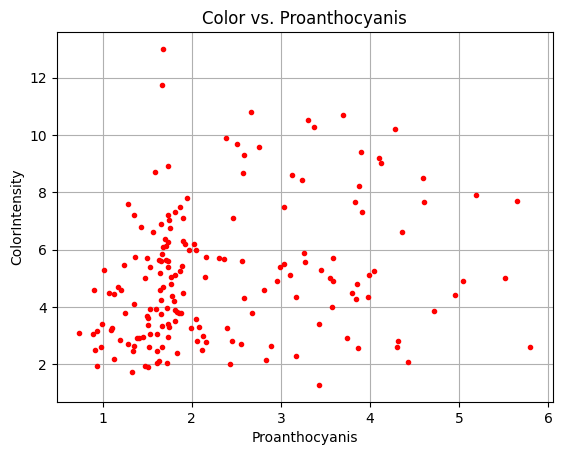

In [128]:
plt.plot(x_data,y_data,'.',color='r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Color vs. Proanthocyanis')
plt.show()

En cada iteración debemos calcular el valor de la derivada de la función de costo, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$:

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

## Pruebas
Realizaremos distintas pruebas para aproximar la ecuación de regresión lineal que mejor se ajuste a la distribución de datos, modificando las variables:


*   Θ (theta 0 y 1)
*   α (alpha)
*   Número de iteraciones




### Prueba 1


*   Θ0 = 1
*   Θ1 = 1
*   α = 0.20
*   it = 25

In [129]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.20
# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x_data)
# Número de iteraciones
it = 25

In [130]:
delta =[]
delta_2 = []
predic = []
data = []
for i in range(it):
  predic = []
  for xi, yi in zip(x_data,y_data):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;
  data.append(predic)

print(dJt0)
print(dJt1)

1.0894714520481814
-4.54992618895984


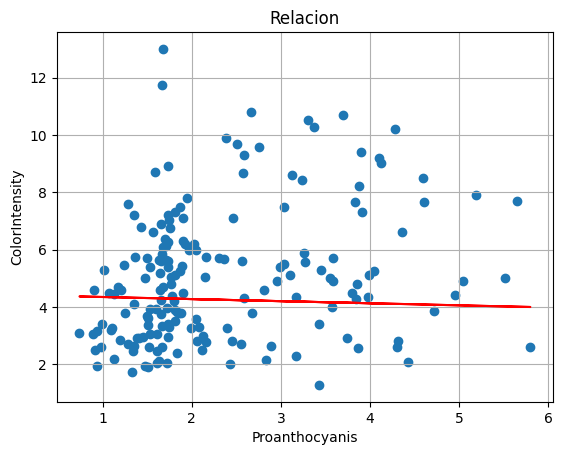

In [131]:
plt.scatter(x_data,y_data)
plt.plot(x_data,data[len(data)-1],'r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Relación')
plt.show()

### Prueba 2

*   Θ0 = 1
*   Θ1 = 1
*   α = 0.4
*   it = 25

In [154]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.4

In [155]:
# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x_data)
# Número de iteraciones
it = 25

In [156]:
delta =[]
delta_2 = []
predic = []
data = []
for i in range(it):
  predic = []
  for xi, yi in zip(x_data,y_data):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;
  data.append(predic)

print(dJt0)
print(dJt1)

-1.373125847796626
-3.0154250824829556


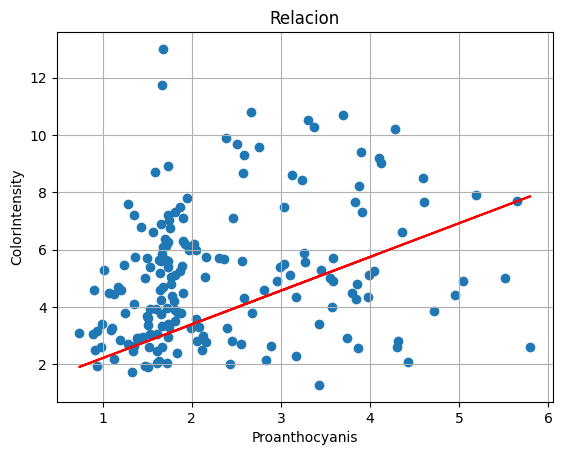

In [157]:
plt.scatter(x_data,y_data)
plt.plot(x_data,data[len(data)-1],'r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Relacion')
plt.show()

### Prueba 3


*   Θ0 = 1
*   Θ1 = 1
*   α = 0.40
*   it = 20




In [181]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.4

# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x_data)
# Número de iteraciones
it = 20


delta =[]
delta_2 = []
predic = []
data = []
for i in range(it):
  predic = []
  for xi, yi in zip(x_data,y_data):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;
  data.append(predic)

print(dJt0)
print(dJt1)

2.9616853273747394
3.321931858009811


Graficar

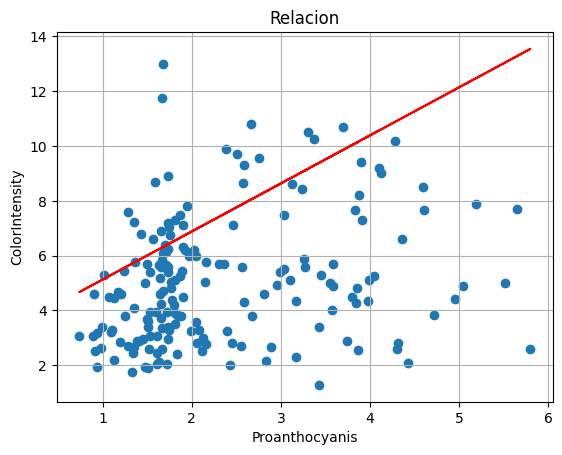

In [182]:
plt.scatter(x_data,y_data)
plt.plot(x_data,data[len(data)-1],'r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Relacion')
plt.show()

### Prueba Final

*   Θ0 = 1
*   Θ1 = 1
*   α = 0.45
*   it = 20

In [184]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.45

# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x_data)
# Número de iteraciones
it = 20


delta =[]
delta_2 = []
predic = []
data = []
for i in range(it):
  predic = []
  for xi, yi in zip(x_data,y_data):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;
  data.append(predic)

print(dJt0)
print(dJt1)

0.6209851987604318
-2.044051127586139


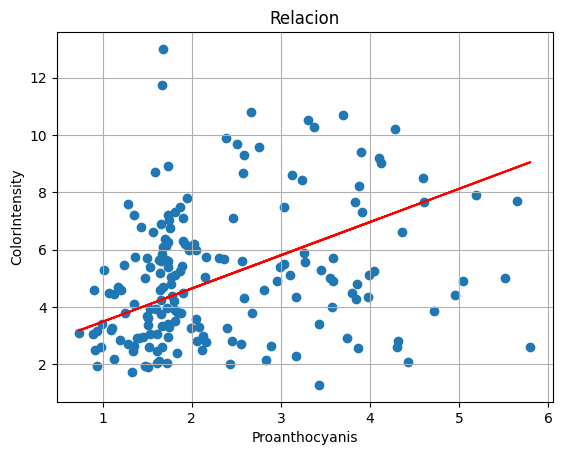

In [185]:
plt.scatter(x_data,y_data)
plt.plot(x_data,data[len(data)-1],'r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Relacion')
plt.show()

## Conclusiones

Visto que la distribución no sigue un comportamiento lineal, este modelo puede no ser el adecuado para predecir la intensidad del color del vino con el Proanthocyanis.

Más adelante se puede probar con otros modelos que se ajusten mejor o buscar otras variables que puedan justificar mejor la intensidad del color o talvez grupos de variables.